In [7]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.2 sec. Average model step in 0.0264 ms.


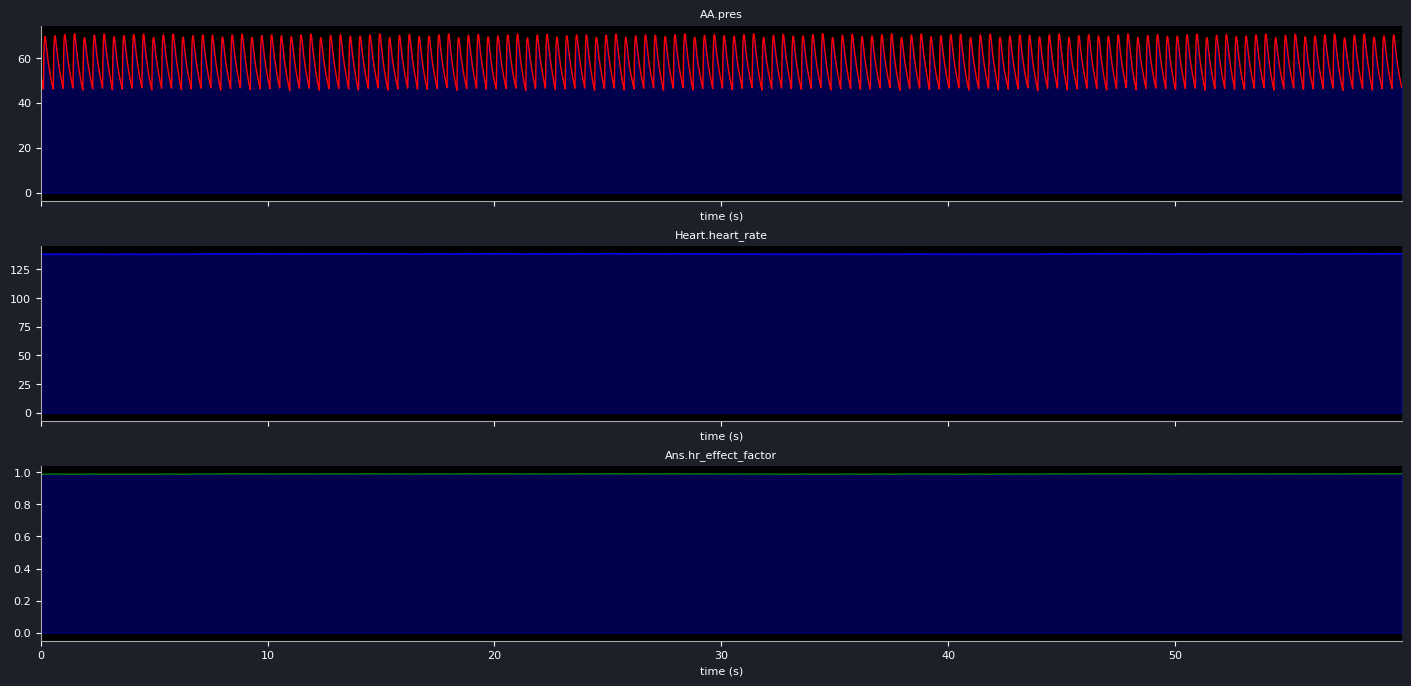


AA.pres         : max   70.77535, min    45.4389 mmHg
Heart.heart_rate: max  138.60455 min  138.07786
Ans.hr_effect_factor: max    0.99003 min    0.98627


In [5]:
#models["Fluids"].add_volume(vol=75, in_time=10)
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["AA.pres", "Heart.heart_rate", "Ans.hr_effect_factor"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=True)

In [6]:
neo.fastforward(120)
neo.get_vitals()

 Ready in 6.2 sec. Average model step in 0.0258 ms.

AA.pres         : max   70.65482, min   45.62736 mmHg
PA.pres         : max   41.55508, min   18.27274 mmHg
IVCI.pres       : max    2.77761, min    1.58348 mmHg


{'heartrate': 138.47900023672517,
 'spo2_pre': 97.64079814193694,
 'spo2_post': 97.37197376670412,
 'abp_systole': 70.65482,
 'abp_diastole': 45.62736,
 'pap_systole': 41.55508,
 'pap_diastole': 18.27274,
 'cvp': 1.9814835290000001,
 'resp_rate': 40.0,
 'pH': 7.39872376311062,
 'po2': 95.12627624221498,
 'pco2': 42.555636345777984,
 'hco3': 25.965376738210377,
 'be': 0.6789666356044084}

All off -> 75 ml loss -> 36/21      hr 140
Only HR -> 75 ml loss -> 35.8/24.2  hr 190